In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dirbase = "/content/gdrive/MyDrive/b-cell classification sars-cov-2/"

In [ ]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics


# check version number
import imblearn

In [ ]:
df = pd.read_csv(dirbase+'dataset-epitope-sars-cov-2-clean-sum-div.csv')
df = df.sample(frac=1).reset_index()

In [ ]:
df['label']

0       Positive
1       Positive
2       Negative
3       Negative
4       Negative
          ...   
1143    Negative
1144    Positive
1145    Positive
1146    Negative
1147    Negative
Name: label, Length: 1148, dtype: object

In [ ]:
del df['index']
del df['Unnamed: 0']
del df['Unnamed: 0.1']

In [ ]:
df[['Description','label']].head()

,Description,label
0,QEVFAQVKQIYK,Positive
1,KSEDAQGMDNLA,Positive
2,GVEGFNCYFPLQ,Negative
3,IICISTKHFYWF,Negative
4,DITFLKKDAPYI,Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   level_0                   1148 non-null   int64  
 1   Description               1148 non-null   object 
 2   Starting Position         1148 non-null   float64
 3   Ending Position           1148 non-null   float64
 4   Antigen Name              1148 non-null   object 
 5   Antigen Accession         1148 non-null   object 
 6   Parent Protein            1148 non-null   object 
 7   Parent Protein Accession  1148 non-null   object 
 8   Organism Name             1148 non-null   object 
 9   Parent Organism           1148 non-null   object 
 10  Parent Organism ID        1148 non-null   int64  
 11  position                  1148 non-null   float64
 12  label                     1148 non-null   object 
 13  SumVectorizer             1148 non-null   int64  
 14  SumDivVe

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
feature = ['Phe', 'Leu', 'Ile', 'Met', 'Val', 'Ser', 'Pro', 'Thr', 'Ala', 'Tyr', 'His', 'Gln', 'Asn', 'Lys', 'Asp', 'Glu', 'Cys', 'Trp', 'Arg', 'Gly']
X = df[feature]
y = df['label']
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)
#counter = Counter(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
print(len(df[df['label']=='Negative']))
print(len(df[df['label']=='Positive']))

587
561


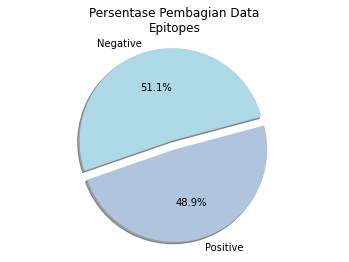

In [ ]:
Tasks = [len(df[df['label']=='Negative']),len(df[df['label']=='Positive'])]

my_labels = ['Negative','Positive']
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Persentase Pembagian Data\nEpitopes')
plt.axis('equal')
plt.show()

In [ ]:
#print(counter)

In [ ]:
"""
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
"""
X_train_std = X_train
X_test_std = X_test

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear',probability=True)
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', probability=True, random_state=1)

In [ ]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.578


In [ ]:
KOEF = svc.coef_
print(KOEF)
len(KOEF[0])

[[-0.01563694 -0.02883833 -0.02986291  0.02703677 -0.00544305  0.0066977
   0.05056535  0.01555895 -0.02601415 -0.01069603 -0.0302123   0.03686906
   0.05809242  0.01010566  0.01062349 -0.02723496 -0.04858788 -0.02596975
   0.03275512  0.00019177]]


20

In [ ]:
def protein_extract(PRO,tipe):
    gen = PRO.lower()
    cod = [gen[i:i+1] for i in range(0,len(gen),1)]
    phe = 0
    leu = 0
    ile = 0
    met = 0
    val = 0
    ser = 0
    pro = 0
    thr = 0
    ala = 0
    tyr = 0
    his = 0
    gln = 0
    asn = 0
    lys = 0
    asp = 0
    glu = 0
    cys = 0
    trp = 0
    arg = 0
    gly = 0
    if(tipe == "protein"):
      for j in range(0,len(cod)):
        phe += cod.count('f')
        leu += cod.count('l')
        ile += cod.count('i')
        met += cod.count('m')
        val += cod.count('v')
        ser += cod.count('s')
        pro += cod.count('p')
        thr += cod.count('t')
        ala += cod.count('a')
        tyr += cod.count('y')
        his += cod.count('h')
        gln += cod.count('q')
        asn += cod.count('n')
        lys += cod.count('k')
        asp += cod.count('d')
        glu += cod.count('e')
        cys += cod.count('c')
        trp += cod.count('w')
        arg += cod.count('r')
        gly += cod.count('g')
    	
      protein = {"Phe":(phe/len(cod))*100,"Leu":(leu/len(cod))*100,"Ile":( ile/len(cod))*100,"Met":(met/len(cod))*100,"Val" :( val/len(cod))*100,"Ser":( ser/len(cod))*100,"Pro":(pro/len(cod))*100,"Thr":(thr/len(cod))*100,"Ala":(ala/len(cod))*100,"Tyr":(tyr/len(cod))*100,"His":(his/len(cod))*100,"Gln":(gln/len(cod))*100,"Asn":(asn/len(cod))*100,"Lys":(lys/len(cod))*100,"Asp":(asp/len(cod))*100,"Glu":(glu/len(cod))*100,"Cys":(cys/len(cod))*100,"Trp":(trp/len(cod))*100,"Arg":(arg/len(cod))*100,"Gly":(gly/len(cod))*100,"Length":len(cod),"description":""}
        
      return protein
    else:
      return "this function only for protein data"

In [ ]:
aa=protein_extract('SEPVLKGVKLHYT','protein')
Aa = pd.DataFrame([aa])
del Aa['Length']
del Aa['description']
Aa

,Phe,Leu,Ile,Met,Val,Ser,Pro,Thr,Ala,Tyr,His,Gln,Asn,Lys,Asp,Glu,Cys,Trp,Arg,Gly
0,0.0,200.0,0.0,0.0,200.0,100.0,100.0,100.0,0.0,100.0,100.0,0.0,0.0,200.0,0.0,100.0,0.0,0.0,0.0,100.0


In [ ]:
testi = svc.predict(Aa)
print(testi[0])

Negative


In [ ]:
dtest = df[df['label']=='Positive']
dtest[feature]

,Phe,Leu,Ile,Met,Val,Ser,Pro,Thr,Ala,Tyr,His,Gln,Asn,Lys,Asp,Glu,Cys,Trp,Arg,Gly
0,8.333333,0.000000,8.333333,0.000000,16.666667,0.000000,0.000000,0.000000,8.333333,8.333333,0.000000,25.000000,0.000000,16.666667,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000
1,0.000000,8.333333,0.000000,8.333333,0.000000,8.333333,0.000000,0.000000,16.666667,0.000000,0.000000,8.333333,8.333333,8.333333,16.666667,8.333333,0.000000,0.000000,0.000000,8.333333
5,16.666667,16.666667,0.000000,0.000000,8.333333,8.333333,8.333333,8.333333,0.000000,0.000000,0.000000,0.000000,8.333333,16.666667,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000
7,8.333333,8.333333,0.000000,0.000000,16.666667,25.000000,0.000000,8.333333,0.000000,0.000000,8.333333,8.333333,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000
13,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,16.666667,8.333333,0.000000,0.000000,8.333333,8.333333,8.333333,8.333333,0.000000,0.000000,0.000000,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,8.333333,0.000000,8.333333,0.000000,0.000000,0.000000,8.333333,16.666667,16.666667,0.000000,8.333333,0.000000,8.333333,8.333333,8.333333,0.000000,8.333333,0.000000,0.000000,0.000000
1137,0.000000,0.000000,8.333333,0.000000,16.666667,0.000000,8.333333,8.333333,16.666667,0.000000,8.333333,8.333333,0.000000,0.000000,8.333333,8.333333,8.333333,0.000000,0.000000,0.000000
1140,0.000000,8.333333,8.333333,0.000000,0.000000,0.000000,8.333333,0.000000,0.000000,16.666667,0.000000,8.333333,0.000000,16.666667,0.000000,8.333333,0.000000,16.666667,0.000000,8.333333
1144,0.000000,0.000000,16.666667,0.000000,8.333333,0.000000,8.333333,0.000000,8.333333,0.000000,0.000000,8.333333,0.000000,16.666667,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000


In [ ]:
testo = svc.predict(dtest[feature])
#print(testo)
benar = 0
salah = 0
for i in range(0,len(dtest[feature])):
  if(testo[i]=='Positive'):
    benar += 1
  else:
    salah += 1

print("benar : ",benar)
print("persentase benar : ",(benar/len(dtest[feature]))*100)
print("salah : ",salah)

benar :  320
persentase benar :  57.04099821746881
salah :  241


In [ ]:
dtest[feature]

,Phe,Leu,Ile,Met,Val,Ser,Pro,Thr,Ala,Tyr,His,Gln,Asn,Lys,Asp,Glu,Cys,Trp,Arg,Gly
0,8.333333,0.000000,8.333333,0.000000,16.666667,0.000000,0.000000,0.000000,8.333333,8.333333,0.000000,25.000000,0.000000,16.666667,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000
1,0.000000,8.333333,0.000000,8.333333,0.000000,8.333333,0.000000,0.000000,16.666667,0.000000,0.000000,8.333333,8.333333,8.333333,16.666667,8.333333,0.000000,0.000000,0.000000,8.333333
5,16.666667,16.666667,0.000000,0.000000,8.333333,8.333333,8.333333,8.333333,0.000000,0.000000,0.000000,0.000000,8.333333,16.666667,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000
7,8.333333,8.333333,0.000000,0.000000,16.666667,25.000000,0.000000,8.333333,0.000000,0.000000,8.333333,8.333333,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000
13,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000,8.333333,0.000000,16.666667,8.333333,0.000000,0.000000,8.333333,8.333333,8.333333,8.333333,0.000000,0.000000,0.000000,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,8.333333,0.000000,8.333333,0.000000,0.000000,0.000000,8.333333,16.666667,16.666667,0.000000,8.333333,0.000000,8.333333,8.333333,8.333333,0.000000,8.333333,0.000000,0.000000,0.000000
1137,0.000000,0.000000,8.333333,0.000000,16.666667,0.000000,8.333333,8.333333,16.666667,0.000000,8.333333,8.333333,0.000000,0.000000,8.333333,8.333333,8.333333,0.000000,0.000000,0.000000
1140,0.000000,8.333333,8.333333,0.000000,0.000000,0.000000,8.333333,0.000000,0.000000,16.666667,0.000000,8.333333,0.000000,16.666667,0.000000,8.333333,0.000000,16.666667,0.000000,8.333333
1144,0.000000,0.000000,16.666667,0.000000,8.333333,0.000000,8.333333,0.000000,8.333333,0.000000,0.000000,8.333333,0.000000,16.666667,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000


In [ ]:
bb=protein_extract('SEPVLKGVKLHYT','protein')
Bb = pd.DataFrame([bb])
del Bb['Length']
del Bb['description']
testo1 = svc.predict(Bb)
testo1[0]

'Negative'

In [ ]:
text = "akuadalahaku"
text[0:8]

'akuadala'

In [ ]:
possible = []
for i in range(0,len(text)):
  start = i
  end = i+8
  if(end <= len(text)):
    txt = text[start:end]
    possible.append(txt)

In [ ]:
def poss(panjang,text):
  possible = []
  st = []
  en = []
  
  for i in range(0,len(text)):
    start = i
    end = i+panjang
    if(end <= len(text)):
      txt = text[start:end]
      possible.append(txt)
      st.append(start)
      en.append(end)

  epitopes = []
  final_start = []
  final_end = []

  for j in range(0,len(possible)):
    bb=protein_extract(possible[j],'protein')
    Bb = pd.DataFrame([bb])
    del Bb['Length']
    del Bb['description']
    testo1 = svc.predict(Bb)
    if(testo1[0]=="Positive"):
      epitopes.append(possible[j])
      final_start.append(st[j])
      final_end.append(en[j])
  return epitopes, final_start, final_end

In [ ]:
def poss1(panjang,text):
  possible = []
  st = []
  en = []
  epitopes = []
  proba=[]
  
  i = 0
  e = 0+panjang
  while(len(text)>i):
    start = i
    end = e
    if(end <= len(text)):
      txt = text[start:end]
      bb=protein_extract(txt,'protein')
      Bb = pd.DataFrame([bb])
      del Bb['Length']
      del Bb['description']
      testo1 = svc.predict(Bb)
      testo2 = svc.predict_proba(Bb)
      if(testo1[0]=="Positive"):
        epitopes.append(txt)
        st.append(start)
        en.append(en)
        proba.append(testo2)
        i += e
        e += e
      else:
        i += 1
        e += 1

    else:
      break
      #possible.append(txt)
      #st.append(start)
      #en.append(end)

  return epitopes, st, en, proba

In [ ]:
def testo(text,start,end):
    txt = text[start:end]
    bb=protein_extract(txt,'protein')
    Bb = pd.DataFrame([bb])
    del Bb['Length']
    del Bb['description']
    testo1 = svc.predict(Bb)
    return testo1[0]

In [ ]:
cot = "MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGG"

In [ ]:
#print(len(cot))
dd, start, end, prob = poss1(10,cot)
#print(prob)
print(prob[0])

[[0.13566155 0.86433845]]


In [ ]:
print()

In [ ]:
lp = [1,2,3]
print(max(lp))

3


In [ ]:
dd, start, end = poss(9,'MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGG')
print(dd)

['MESLVPGFN', 'ESLVPGFNE', 'SLVPGFNEK', 'LVPGFNEKT', 'VPGFNEKTH', 'PGFNEKTHV', 'GFNEKTHVQ', 'FNEKTHVQL', 'NEKTHVQLS', 'KTHVQLSLP', 'THVQLSLPV', 'VQLSLPVLQ', 'QLSLPVLQV', 'LSLPVLQVR', 'SLPVLQVRD', 'LPVLQVRDV', 'PVLQVRDVL', 'LQVRDVLVR', 'QVRDVLVRG', 'VRDVLVRGF', 'RDVLVRGFG', 'ARQHLKDGT', 'EVEKGVLPQ', 'VEKGVLPQL', 'KGVLPQLEQ', 'GVLPQLEQP', 'VLPQLEQPY', 'LPQLEQPYV', 'PQLEQPYVF', 'QLEQPYVFI', 'EQPYVFIKR', 'QPYVFIKRS', 'PYVFIKRSD', 'VFIKRSDAR', 'FIKRSDART', 'IKRSDARTA', 'KRSDARTAP', 'RSDARTAPH', 'SDARTAPHG', 'RTAPHGHVM', 'EGIQYGRSG', 'GIQYGRSGE', 'IQYGRSGET', 'QYGRSGETL', 'YRKVLLRKN', 'RKVLLRKNG', 'KVLLRKNGN', 'VLLRKNGNK', 'LLRKNGNKG', 'LRKNGNKGA', 'RKNGNKGAG', 'KNGNKGAGG', 'NGNKGAGGH', 'GNKGAGGHS', 'NKGAGGHSY', 'LGDELGTDP', 'GDELGTDPY', 'LGTDPYEDF', 'GTDPYEDFQ', 'TDPYEDFQE', 'DPYEDFQEN', 'PYEDFQENW', 'YEDFQENWN', 'EDFQENWNT', 'DFQENWNTK', 'FQENWNTKH', 'QENWNTKHS', 'ENWNTKHSS', 'NWNTKHSSG', 'WNTKHSSGV', 'NTKHSSGVT', 'TKHSSGVTR', 'KHSSGVTRE', 'SSGVTRELM', 'SGVTRELMR', 'GVTRELMRE', 'TRELMRELN'

In [ ]:
def poss2(text):
    panj = len(text)
    POS = []
    for i in range(2,len(text)):
        possi = poss(i,text)

In [ ]:
import pickle

# save the model to disk
filename = dirbase+'b-cell classification sars-cov-2-svm.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
import pickle

# save the model to disk
filename = '/content/b-cell classification sars-cov-2-svm.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
import joblib

file = open(dirbase+"b-cell classification sars-cov-2-svm.pkl","rb")
trained_model = joblib.load(file)
predict = trained_model.predict(dtest[feature])
print(predict)

['Negative' 'Positive' 'Positive' 'Positive' 'Negative' 'Negative'
 'Negative' 'Positive' 'Negative' 'Positive' 'Negative' 'Positive'
 'Negative' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Negative' 'Positive' 'Negative' 'Negative' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Negative' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Negative' 'Positive' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Negative' 'Positive' 'Negative'
 'Positive' 'Negative' 'Positive' 'Positive' 'Negative' 'Negative'
 'Positive' 'Positive' 'Negative' 'Positive' 'Negative' 'Posit

In [ ]:
dtest.head()

,level_0,Description,Starting Position,Ending Position,Antigen Name,Antigen Accession,Parent Protein,Parent Protein Accession,Organism Name,Parent Organism,...,His,Gln,Asn,Lys,Asp,Glu,Cys,Trp,Arg,Gly
0,589,QEVFAQVKQIYK,779.0,790.0,Spike glycoprotein,P0DTC2.1,Spike glycoprotein,P0DTC2,Severe acute respiratory syndrome coronavirus 2,Severe acute respiratory syndrome coronavirus 2,...,0.000000,25.000000,0.000000,16.666667,0.000000,8.333333,0.0,0.0,0.000000,0.000000
1,833,KSEDAQGMDNLA,2029.0,2040.0,orf1ab polyprotein [Severe acute respiratory s...,QHD43415.1,Replicase polyprotein 1ab,P0DTD1,Severe acute respiratory syndrome coronavirus 2,Severe acute respiratory syndrome coronavirus 2,...,0.000000,8.333333,8.333333,8.333333,16.666667,8.333333,0.0,0.0,0.000000,8.333333
5,1128,VLTESNKKFLPF,551.0,562.0,Spike glycoprotein,P0DTC2.1,Spike glycoprotein,P0DTC2,Severe acute respiratory syndrome coronavirus 2,Severe acute respiratory syndrome coronavirus 2,...,0.000000,0.000000,8.333333,16.666667,0.000000,8.333333,0.0,0.0,0.000000,0.000000
7,839,KVFRSSVLHSTQ,41.0,52.0,surface glycoprotein [Severe acute respiratory...,QHD43416.1,Spike glycoprotein,P0DTC2,Severe acute respiratory syndrome coronavirus 2,Severe acute respiratory syndrome coronavirus 2,...,8.333333,8.333333,0.000000,8.333333,0.000000,0.000000,0.0,0.0,8.333333,0.000000
13,697,EAGLPYGANKDG,118.0,129.0,nucleocapsid phosphoprotein [Severe acute resp...,QHD43423.2,Nucleoprotein,P0DTC9,Severe acute respiratory syndrome coronavirus 2,Severe acute respiratory syndrome coronavirus 2,...,0.000000,0.000000,8.333333,8.333333,8.333333,8.333333,0.0,0.0,0.000000,25.000000
